In [1]:
import pandas as pd
import numpy as np
import sys

In [2]:
sys.path.insert(0, '../src')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_parquet('../data/interim/df_merge.parquet')

In [5]:
df.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,ee4aaff43c557e1704ebf52b8abf25ad,2022-05-13,2022-06-15,ATL,BOS,PT8H51M,False,False,False,124.78,NaN,1655319900||1655340000,2022-06-15T15:05:00.000-04:00||2022-06-15T20:4...,1655327040||1655351760,2022-06-15T17:04:00.000-04:00||2022-06-15T23:5...,FLL||BOS,ATL||FLL,Spirit Airlines||Spirit Airlines,NK||NK,||,7140||11760,None||None,coach||coach
1,284bffb121ffdafba55f69d6d89a4b7d,2022-05-13,2022-06-15,ATL,BOS,PT12H31M,False,False,False,138.58,NaN,1655304000||1655337900,2022-06-15T10:40:00.000-04:00||2022-06-15T20:0...,1655309340||1655349060,2022-06-15T12:09:00.000-04:00||2022-06-15T23:1...,MCO||BOS,ATL||MCO,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||AIRBUS INDUST...,5340||11160,None||None,coach||coach
2,8efdd07b82644146d45978f61d081f3b,2022-05-13,2022-06-15,ATL,BOS,PT4H35M,False,False,False,148.60,947.0,1655305440||1655316000,2022-06-15T11:04:00.000-04:00||2022-06-15T14:0...,1655312340||1655321940,2022-06-15T12:59:00.000-04:00||2022-06-15T15:3...,DCA||BOS,ATL||DCA,American Airlines||American Airlines,AA||AA,Embraer 175||Airbus A319,6900||5940,541||406,coach||coach
3,e03c8964b4feb4e206636a9c5c0015b2,2022-05-13,2022-06-15,ATL,BOS,PT4H38M,False,False,False,148.60,947.0,1655292660||1655304180,2022-06-15T07:31:00.000-04:00||2022-06-15T10:4...,1655300100||1655309340,2022-06-15T09:35:00.000-04:00||2022-06-15T12:0...,PHL||BOS,ATL||PHL,American Airlines||American Airlines,AA||AA,Airbus A320||Airbus A321,7440||5160,667||280,coach||coach
4,f44658d6761962cecc3eabc0a29d6ef9,2022-05-13,2022-06-15,ATL,BOS,PT6H43M,False,False,False,148.60,947.0,1655297760||1655316000,2022-06-15T08:56:00.000-04:00||2022-06-15T14:0...,1655304660||1655321940,2022-06-15T10:51:00.000-04:00||2022-06-15T15:3...,DCA||BOS,ATL||DCA,American Airlines||American Airlines,AA||AA,Canadair Regional Jet 900||Airbus A319,6900||5940,541||406,coach||coach


In [6]:
df.describe()

,totalFare,totalTravelDistance
count,1.352000e+07,1.256038e+07
mean,3.737535e+02,1.569619e+03
std,2.075496e+02,8.414888e+02
min,2.397000e+01,9.700000e+01
25%,2.235800e+02,8.620000e+02
50%,3.446000e+02,1.392000e+03
75%,4.876000e+02,2.376000e+03
max,8.260610e+03,4.430000e+03


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13519999 entries, 0 to 13519998
Data columns (total 23 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   legId                              object 
 1   searchDate                         object 
 2   flightDate                         object 
 3   startingAirport                    object 
 4   destinationAirport                 object 
 5   travelDuration                     object 
 6   isBasicEconomy                     bool   
 7   isRefundable                       bool   
 8   isNonStop                          bool   
 9   totalFare                          float64
 10  totalTravelDistance                float64
 11  segmentsDepartureTimeEpochSeconds  object 
 12  segmentsDepartureTimeRaw           object 
 13  segmentsArrivalTimeEpochSeconds    object 
 14  segmentsArrivalTimeRaw             object 
 15  segmentsArrivalAirportCode         object 
 16  segmentsDepartur

In [8]:
df.shape

(13519999, 23)

In [9]:
from data.data_prep import check_missing_value

In [10]:
df_na = check_missing_value(df)

Column with missing values:
                          Column  Missing Values  Missing Percentage
10           totalTravelDistance          959619            7.097774
19  segmentsEquipmentDescription          262676            1.942870
21              segmentsDistance          126985            0.939238


In [11]:
search_date = df.groupby('searchDate').size().reset_index(name='counts')

In [12]:
from data.data_prep import plot_bar

/Users/narongvatchingpayakmon/Projects/Spring2023/adv_mla_2023/at3_group_9/notebooks/../src/data/data_prep.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=x, y=y, palette='ch:.25')


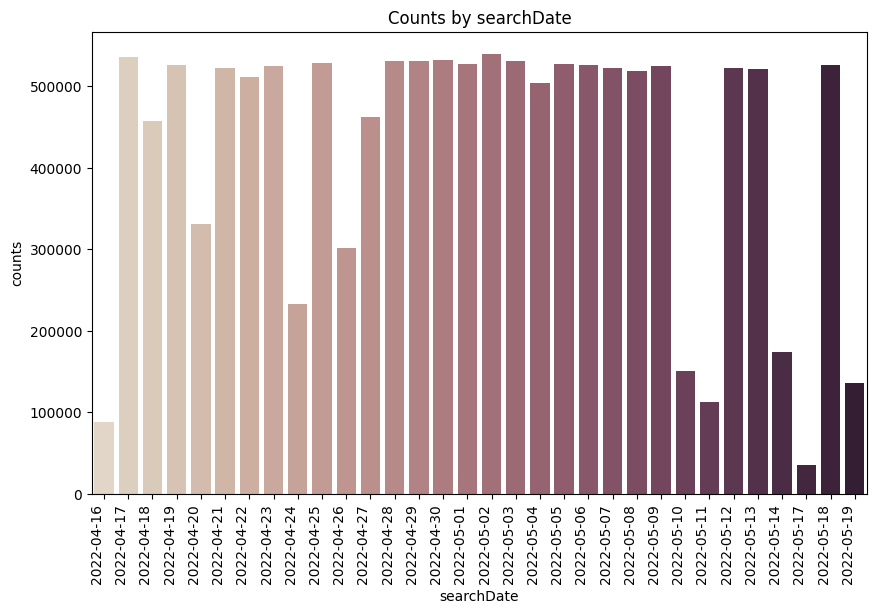

In [13]:
plot_bar(search_date, 'searchDate', 'counts')

In [14]:
flightdate = df.groupby('flightDate').size().reset_index(name='counts')

/Users/narongvatchingpayakmon/Projects/Spring2023/adv_mla_2023/at3_group_9/notebooks/../src/data/data_prep.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=x, y=y, palette='ch:.25')


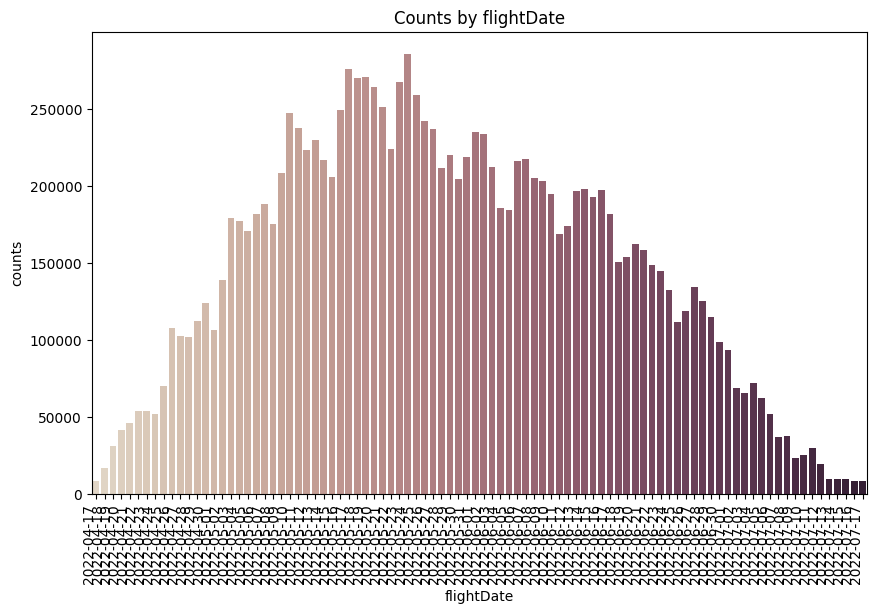

In [15]:
plot_bar(flightdate, 'flightDate', 'counts')

In [16]:
df_cleaned = df.copy()

In [17]:
df_cleaned.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,ee4aaff43c557e1704ebf52b8abf25ad,2022-05-13,2022-06-15,ATL,BOS,PT8H51M,False,False,False,124.78,NaN,1655319900||1655340000,2022-06-15T15:05:00.000-04:00||2022-06-15T20:4...,1655327040||1655351760,2022-06-15T17:04:00.000-04:00||2022-06-15T23:5...,FLL||BOS,ATL||FLL,Spirit Airlines||Spirit Airlines,NK||NK,||,7140||11760,None||None,coach||coach
1,284bffb121ffdafba55f69d6d89a4b7d,2022-05-13,2022-06-15,ATL,BOS,PT12H31M,False,False,False,138.58,NaN,1655304000||1655337900,2022-06-15T10:40:00.000-04:00||2022-06-15T20:0...,1655309340||1655349060,2022-06-15T12:09:00.000-04:00||2022-06-15T23:1...,MCO||BOS,ATL||MCO,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||AIRBUS INDUST...,5340||11160,None||None,coach||coach
2,8efdd07b82644146d45978f61d081f3b,2022-05-13,2022-06-15,ATL,BOS,PT4H35M,False,False,False,148.60,947.0,1655305440||1655316000,2022-06-15T11:04:00.000-04:00||2022-06-15T14:0...,1655312340||1655321940,2022-06-15T12:59:00.000-04:00||2022-06-15T15:3...,DCA||BOS,ATL||DCA,American Airlines||American Airlines,AA||AA,Embraer 175||Airbus A319,6900||5940,541||406,coach||coach
3,e03c8964b4feb4e206636a9c5c0015b2,2022-05-13,2022-06-15,ATL,BOS,PT4H38M,False,False,False,148.60,947.0,1655292660||1655304180,2022-06-15T07:31:00.000-04:00||2022-06-15T10:4...,1655300100||1655309340,2022-06-15T09:35:00.000-04:00||2022-06-15T12:0...,PHL||BOS,ATL||PHL,American Airlines||American Airlines,AA||AA,Airbus A320||Airbus A321,7440||5160,667||280,coach||coach
4,f44658d6761962cecc3eabc0a29d6ef9,2022-05-13,2022-06-15,ATL,BOS,PT6H43M,False,False,False,148.60,947.0,1655297760||1655316000,2022-06-15T08:56:00.000-04:00||2022-06-15T14:0...,1655304660||1655321940,2022-06-15T10:51:00.000-04:00||2022-06-15T15:3...,DCA||BOS,ATL||DCA,American Airlines||American Airlines,AA||AA,Canadair Regional Jet 900||Airbus A319,6900||5940,541||406,coach||coach


In [18]:
from data.data_prep import convert_to_unix_timestamp

In [19]:
df_cleaned = convert_to_unix_timestamp(df_cleaned, 'searchDate')
df_cleaned = convert_to_unix_timestamp(df_cleaned, 'flightDate')

In [20]:
airport_mapping = {'ATL': 0,
                'BOS': 1,
                'CLT': 2,
                'DEN': 3,
                'DFW': 4,
                'DTW': 5,
                'EWR': 6,
                'IAD': 7,
                'JFK': 8,
                'LAX': 9,
                'LGA': 10,
                'MIA': 11,
                'OAK': 12,
                'ORD': 13,
                'PHL': 14,
                'SFO': 15}

In [21]:
df_cleaned['startingAirport'] = df_cleaned['startingAirport'].map(airport_mapping)
df_cleaned['destinationAirport'] = df_cleaned['destinationAirport'].map(airport_mapping)

In [23]:
from data.data_prep import duration_to_minutes

In [24]:
df_cleaned['travelDuration'] = df_cleaned['travelDuration'].apply(duration_to_minutes)

In [25]:
df_cleaned.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,ee4aaff43c557e1704ebf52b8abf25ad,1.652364e+09,1.655215e+09,0,1,531.0,False,False,False,124.78,NaN,1655319900||1655340000,2022-06-15T15:05:00.000-04:00||2022-06-15T20:4...,1655327040||1655351760,2022-06-15T17:04:00.000-04:00||2022-06-15T23:5...,FLL||BOS,ATL||FLL,Spirit Airlines||Spirit Airlines,NK||NK,||,7140||11760,None||None,coach||coach
1,284bffb121ffdafba55f69d6d89a4b7d,1.652364e+09,1.655215e+09,0,1,751.0,False,False,False,138.58,NaN,1655304000||1655337900,2022-06-15T10:40:00.000-04:00||2022-06-15T20:0...,1655309340||1655349060,2022-06-15T12:09:00.000-04:00||2022-06-15T23:1...,MCO||BOS,ATL||MCO,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||AIRBUS INDUST...,5340||11160,None||None,coach||coach
2,8efdd07b82644146d45978f61d081f3b,1.652364e+09,1.655215e+09,0,1,275.0,False,False,False,148.60,947.0,1655305440||1655316000,2022-06-15T11:04:00.000-04:00||2022-06-15T14:0...,1655312340||1655321940,2022-06-15T12:59:00.000-04:00||2022-06-15T15:3...,DCA||BOS,ATL||DCA,American Airlines||American Airlines,AA||AA,Embraer 175||Airbus A319,6900||5940,541||406,coach||coach
3,e03c8964b4feb4e206636a9c5c0015b2,1.652364e+09,1.655215e+09,0,1,278.0,False,False,False,148.60,947.0,1655292660||1655304180,2022-06-15T07:31:00.000-04:00||2022-06-15T10:4...,1655300100||1655309340,2022-06-15T09:35:00.000-04:00||2022-06-15T12:0...,PHL||BOS,ATL||PHL,American Airlines||American Airlines,AA||AA,Airbus A320||Airbus A321,7440||5160,667||280,coach||coach
4,f44658d6761962cecc3eabc0a29d6ef9,1.652364e+09,1.655215e+09,0,1,403.0,False,False,False,148.60,947.0,1655297760||1655316000,2022-06-15T08:56:00.000-04:00||2022-06-15T14:0...,1655304660||1655321940,2022-06-15T10:51:00.000-04:00||2022-06-15T15:3...,DCA||BOS,ATL||DCA,American Airlines||American Airlines,AA||AA,Canadair Regional Jet 900||Airbus A319,6900||5940,541||406,coach||coach


In [27]:
bool_col = ['isBasicEconomy', 'isRefundable', 'isNonStop']

df_cleaned[bool_col] = df_cleaned[bool_col].astype(int)

In [28]:
df_cleaned

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,ee4aaff43c557e1704ebf52b8abf25ad,1.652364e+09,1.655215e+09,0,1,531.0,0,0,0,124.78,NaN,1655319900||1655340000,2022-06-15T15:05:00.000-04:00||2022-06-15T20:4...,1655327040||1655351760,2022-06-15T17:04:00.000-04:00||2022-06-15T23:5...,FLL||BOS,ATL||FLL,Spirit Airlines||Spirit Airlines,NK||NK,||,7140||11760,None||None,coach||coach
1,284bffb121ffdafba55f69d6d89a4b7d,1.652364e+09,1.655215e+09,0,1,751.0,0,0,0,138.58,NaN,1655304000||1655337900,2022-06-15T10:40:00.000-04:00||2022-06-15T20:0...,1655309340||1655349060,2022-06-15T12:09:00.000-04:00||2022-06-15T23:1...,MCO||BOS,ATL||MCO,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||AIRBUS INDUST...,5340||11160,None||None,coach||coach
2,8efdd07b82644146d45978f61d081f3b,1.652364e+09,1.655215e+09,0,1,275.0,0,0,0,148.60,947.0,1655305440||1655316000,2022-06-15T11:04:00.000-04:00||2022-06-15T14:0...,1655312340||1655321940,2022-06-15T12:59:00.000-04:00||2022-06-15T15:3...,DCA||BOS,ATL||DCA,American Airlines||American Airlines,AA||AA,Embraer 175||Airbus A319,6900||5940,541||406,coach||coach
3,e03c8964b4feb4e206636a9c5c0015b2,1.652364e+09,1.655215e+09,0,1,278.0,0,0,0,148.60,947.0,1655292660||1655304180,2022-06-15T07:31:00.000-04:00||2022-06-15T10:4...,1655300100||1655309340,2022-06-15T09:35:00.000-04:00||2022-06-15T12:0...,PHL||BOS,ATL||PHL,American Airlines||American Airlines,AA||AA,Airbus A320||Airbus A321,7440||5160,667||280,coach||coach
4,f44658d6761962cecc3eabc0a29d6ef9,1.652364e+09,1.655215e+09,0,1,403.0,0,0,0,148.60,947.0,1655297760||1655316000,2022-06-15T08:56:00.000-04:00||2022-06-15T14:0...,1655304660||1655321940,2022-06-15T10:51:00.000-04:00||2022-06-15T15:3...,DCA||BOS,ATL||DCA,American Airlines||American Airlines,AA||AA,Canadair Regional Jet 900||Airbus A319,6900||5940,541||406,coach||coach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13519994,af400da699e8c6eb5279d9faebebfda6,1.650204e+09,1.653746e+09,15,14,568.0,0,0,0,576.59,2663.0,1653832800||1653864120,2022-05-29T07:00:00.000-07:00||2022-05-29T18:4...,1653852180||1653866880,2022-05-29T15:23:00.000-04:00||2022-05-29T19:2...,EWR||PHL,SFO||EWR,United||United,UA||UA,BOEING 787-9||Embraer 170,19380||2760,2566||97,coach||coach
13519995,8596635390fee2bec372722143d202dc,1.650204e+09,1.653746e+09,15,14,689.0,0,0,0,582.19,2663.0,1653832800||1653871260,2022-05-29T07:00:00.000-07:00||2022-05-29T20:4...,1653852180||1653874140,2022-05-29T15:23:00.000-04:00||2022-05-29T21:2...,EWR||PHL,SFO||EWR,United||United,UA||UA,BOEING 787-9||Embraer 175 (Enhanced Winglets),19380||2880,2566||97,coach||coach
13519996,b05de812c6b360e4e1bb369b55ea3f48,1.650204e+09,1.653746e+09,15,14,466.0,0,0,0,650.61,2970.0,1653810900||1653827100,2022-05-29T00:55:00.000-07:00||2022-05-29T07:2...,1653824340||1653838860,2022-05-29T06:39:00.000-05:00||2022-05-29T11:4...,IAH||PHL,SFO||IAH,United||United,UA||UA,Boeing 737-900||Boeing 737-800,13440||11760,1641||1329,coach||coach
13519997,4a571023347edd441adf0d6de1952294,1.650204e+09,1.653746e+09,15,14,477.0,0,0,0,678.60,2802.0,1653856620||1653878400,2022-05-29T13:37:00.000-07:00||2022-05-29T22:4...,1653873420||1653885240,2022-05-29T21:17:00.000-04:00||2022-05-30T00:3...,ATL||PHL,SFO||ATL,Delta||Delta,DL||DL,Boeing 757-300||Boeing 737-900,16800||6840,2135||667,coach||coach
